# Launcher of the Darcy Flow Hands On

## 1. Pure data-drive solution of Darcy Flow with Fourier Neural Operator

In [1]:
%pip install gdown

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.2.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.14.3-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/py

In [2]:
!(export HYDRA_FULL_ERROR=1 && \
    export CUDA_LAUNCH_BLOCKING=1 && \
    export OC_CAUSE=1 && \
    python3 \
    ./darcy_FNO.py\
    --config-name 'config_FNO' \
    |& tee -a ./logs/darcy_FNO.txt\
)

/usr/local/lib/python3.12/dist-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[W1218 09:25:37.216311485 init.cpp:779] Warning: nvfuser is no longer supported in torch script, use _jit_set_nvfuser_single_node_mode is deprecated and a no-op (function operator())
[W1218 09:25:37.216349584 init.cpp:767] Warning: nvfuser is no longer supported in torch script, use _jit_set_nvfuser_enabled is deprecated and a no-op (function operator())
[09:25:37] - JIT using the NVFuser TorchScript backend
[09:25:37] - JitManager: {'_enabled': True, '_arch_mode': <JitArchMode.ONLY_ACTIVATION: 1>, '_use_nvfuser': True, '_autograd_nodes': False}
[09:25:37] - GraphManager: {'_func_arch': False, '_debug': False, '_func_arch_allow_partial_hessian': True}
[09:25:37] - AmpManager: {'_enabled': False, '_mode

## 2. Adding Physics-Informed loss: PINO

In [3]:
!(export HYDRA_FULL_ERROR=1 && \
    export CUDA_LAUNCH_BLOCKING=1 && \
    export OC_CAUSE=1 && \
    python3 \
    ./darcy_PINO.py\
    --config-name 'config_PINO' \
    |& tee -a ./logs/darcy_PINO.txt\
)

/usr/local/lib/python3.12/dist-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[W1218 09:50:54.959656241 init.cpp:767] Warning: nvfuser is no longer supported in torch script, use _jit_set_nvfuser_enabled is deprecated and a no-op (function operator())
[09:50:54] - JitManager: {'_enabled': False, '_arch_mode': <JitArchMode.ONLY_ACTIVATION: 1>, '_use_nvfuser': True, '_autograd_nodes': False}
[09:50:54] - GraphManager: {'_func_arch': False, '_debug': False, '_func_arch_allow_partial_hessian': True}
[09:50:54] - AmpManager: {'_enabled': False, '_mode': <AmpMode.PER_ORDER_SCALER: 0>, '_dtype': torch.float16, '_default_max_scale': 1, '_autocast_activation': False, '_autocast_firstlayer': False, '_special_terms': [], '_custom_max_scales': {}}
loaded: /home/private/PINN2026/4. Darcy Flo

## 3. Using DeepONet (data informed)

In [4]:
!(export HYDRA_FULL_ERROR=1 && \
    export CUDA_LAUNCH_BLOCKING=1 && \
    export OC_CAUSE=1 && \
    python3 \
    ./darcy_DeepO.py\
    --config-name 'config_DeepO' \
    |& tee -a ./logs/darcy_DeepO.txt\
)

/usr/local/lib/python3.12/dist-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[W1218 11:03:45.656802520 init.cpp:779] Warning: nvfuser is no longer supported in torch script, use _jit_set_nvfuser_single_node_mode is deprecated and a no-op (function operator())
[W1218 11:03:45.656841319 init.cpp:767] Warning: nvfuser is no longer supported in torch script, use _jit_set_nvfuser_enabled is deprecated and a no-op (function operator())
[11:03:45] - JIT using the NVFuser TorchScript backend
[11:03:45] - JitManager: {'_enabled': True, '_arch_mode': <JitArchMode.ONLY_ACTIVATION: 1>, '_use_nvfuser': True, '_autograd_nodes': False}
[11:03:45] - GraphManager: {'_func_arch': False, '_debug': False, '_func_arch_allow_partial_hessian': True}
[11:03:45] - AmpManager: {'_enabled': False, '_mode

In [31]:
import numpy as np
data = np.load("./outputs/darcy_DeepO/validators/val.npz", allow_pickle=True)["arr_0"].item()

In [34]:
# Now you can access entries directly
coeff = data['coeff']
x = data['x']
y = data['y']
true_sol = data['true_sol']
pred_sol = data['pred_sol']

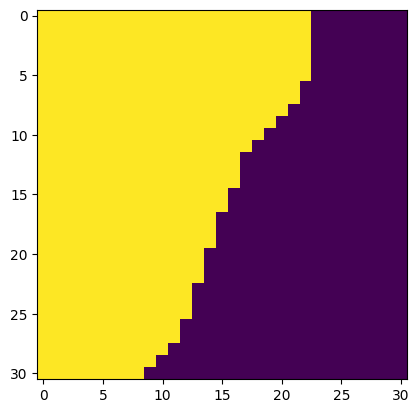

In [83]:
plt.imshow( data['coeff'][2883,0] )

In [70]:
31*31*10

9610

In [88]:
sim_idx = 5

def retrieve_sim(sim_idx: int):
    N_batch_sims = 31*31
    #print(sim_idx * N_batch_sims)
    coeff = data['coeff'][sim_idx * N_batch_sims, 0, :, :]
    x = data['x'][sim_idx * N_batch_sims: (sim_idx+1) * N_batch_sims]
    y = data['y'][sim_idx * N_batch_sims: (sim_idx+1) * N_batch_sims]
    true_sol = data['true_sol'][sim_idx * N_batch_sims: (sim_idx+1) * N_batch_sims]
    pred_sol = data['pred_sol'][sim_idx * N_batch_sims: (sim_idx+1) * N_batch_sims]
    return coeff, x[:, 0], y[:, 0], true_sol[:, 0], pred_sol[:, 0]

coeff, x, y, true_sol, pred_sol = retrieve_sim(sim_idx)

4805


6727


Text(0.5, 1.0, 'ERR')

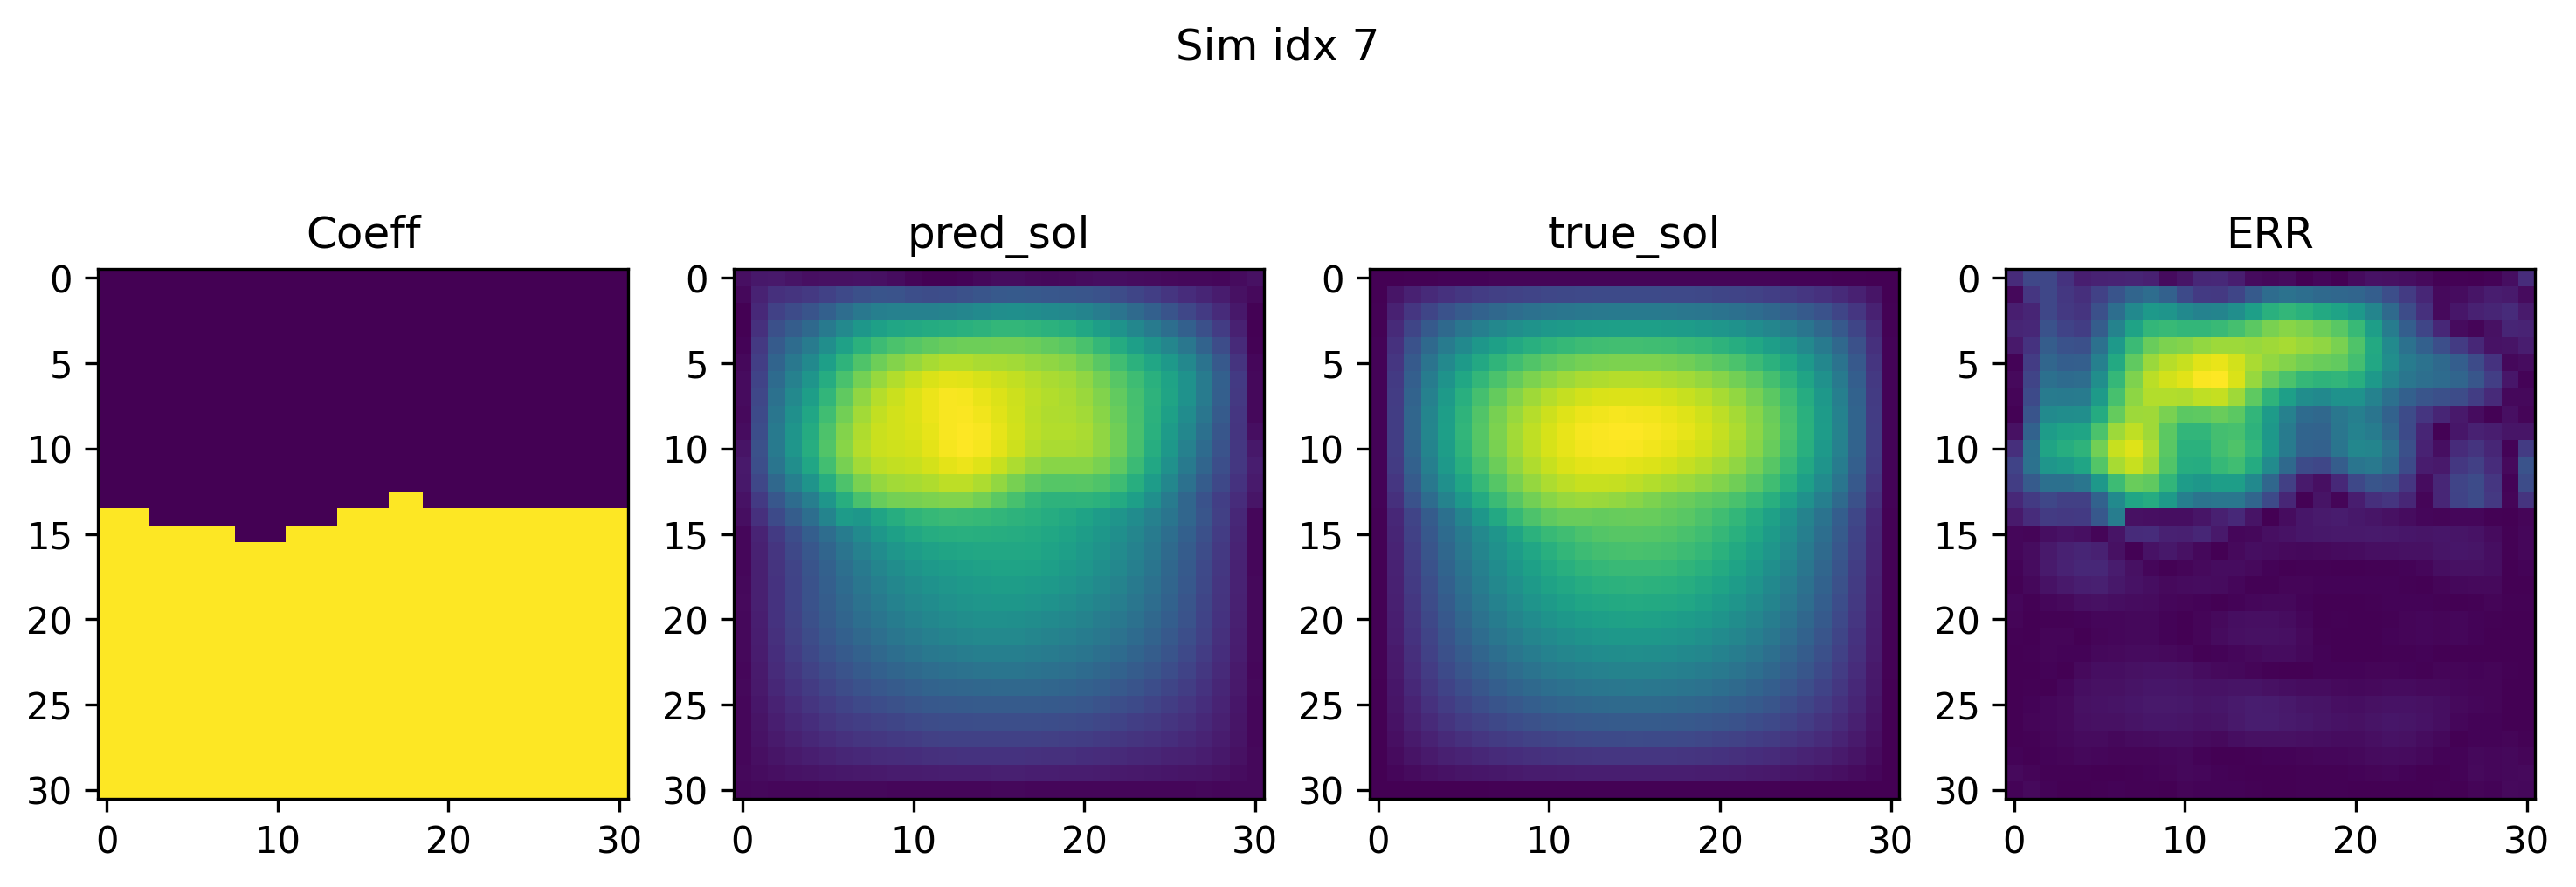

In [108]:
sim_idx = 7
coeff, x, y, true_sol, pred_sol = retrieve_sim(sim_idx)

fig, axs = plt.subplots(1,4,dpi=300, figsize=(12,4) )
fig.suptitle(f"Sim idx {sim_idx}")
axs[0].imshow(coeff)
axs[0].set_title(f"Coeff")

axs[1].imshow(pred_sol.reshape(31,31))
axs[1].set_title(f"pred_sol")

axs[2].imshow(true_sol.reshape(31,31))
axs[2].set_title(f"true_sol")

axs[3].imshow(
    (
        np.abs(true_sol - pred_sol) 
    ).reshape(31,31)
)
axs[3].set_title(f"ERR")
